<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Building-a-Logistic-Regression" data-toc-modified-id="Building-a-Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Building a Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Declare-the-dependent-and-independent-variables" data-toc-modified-id="Declare-the-dependent-and-independent-variables-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Declare the dependent and independent variables</a></span></li><li><span><a href="#Simple-Logistic-Regression" data-toc-modified-id="Simple-Logistic-Regression-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Simple Logistic Regression</a></span></li></ul></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot</a></span></li></ul></div>

# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook settings for pandas
pd.set_option('display.float_format', '{:,.2f}'.format) 

pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [1]:
!ls ../data/csv/

Example-bank-data.csv                real_estate_price_size_year.csv
real_estate_price_size.csv           real_estate_price_size_year_view.csv


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
df = pd.read_csv('../data/csv/Example-bank-data.csv',index_col=0)
df.head()

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no


In [4]:
df['y'] = df['y'].map({'yes':1, 'no':0})
df.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


### Declare the dependent and independent variables

In [6]:
y = df['y'] # logistic output
x1 = df['duration']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:                  0.2121
Time:                        16:57:07   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [8]:
results_log.params

const      -1.70
duration    0.01
dtype: float64

# Plot

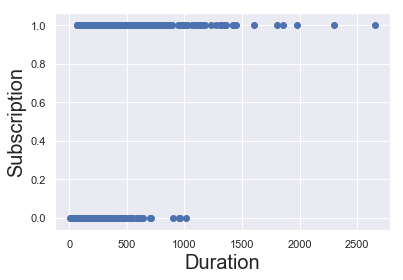

In [10]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')

# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

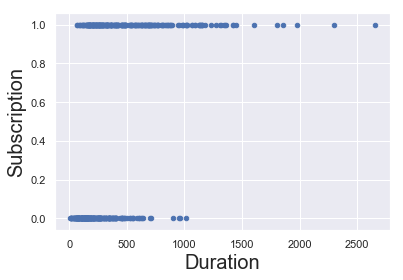

In [26]:
ax = df.plot(x='duration', y='y', kind='scatter',color='b');
ax.set_ylabel('Subscription',fontsize=20);
ax.set_xlabel('Duration',fontsize=20);

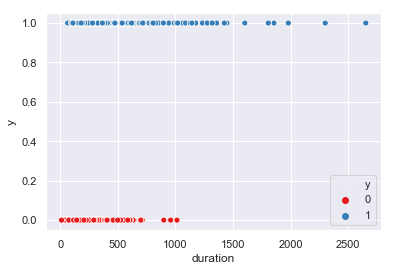

In [32]:
sns.scatterplot(x='duration',y='y',hue='y',data=df,palette="Set1");